## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 21, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Oct. 16, 2018 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [115]:
## Import needed libraries to perform cleaning, modeling and validation.
# normal imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# cleaning imports
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, RobustScaler
# model imports
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, ElasticNet, Lasso,  BayesianRidge, SGDRegressor
# validation imports
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb

In [132]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [149]:
## Import train and test data, look for 
htrain = pd.read_csv('house_train.csv')
htest = pd.read_csv('house_test.csv')
hcols = htrain.columns

# Visualizing the Data

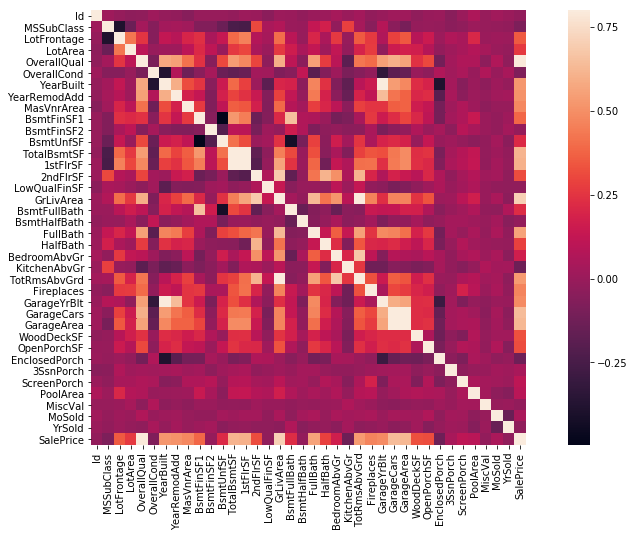

In [150]:
## I first want to see the correlation between all numerical data and the sales data set. 
corr_mat = htrain.corr()
fig,ax = plt.subplots()
sns.heatmap(corr_mat,vmax=.8,square=True)

In [151]:
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We see that many of these variables have a high correlation to our desired target data, which is really good for regression models, however there are several variables that have a negative correlation to our data. We will still use these in our analysis to add in extra variance for the models to build upon.

## Dealing with Anomalies

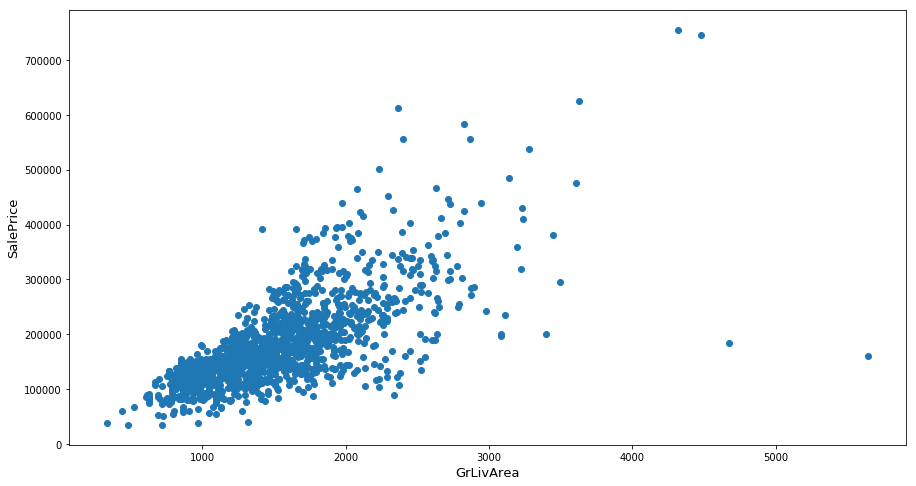

In [152]:
## We first graph some of the anomalies to understand our data a bit better. 
fig, ax = plt.subplots()
ax.scatter(x = htrain['GrLivArea'], y = htrain['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

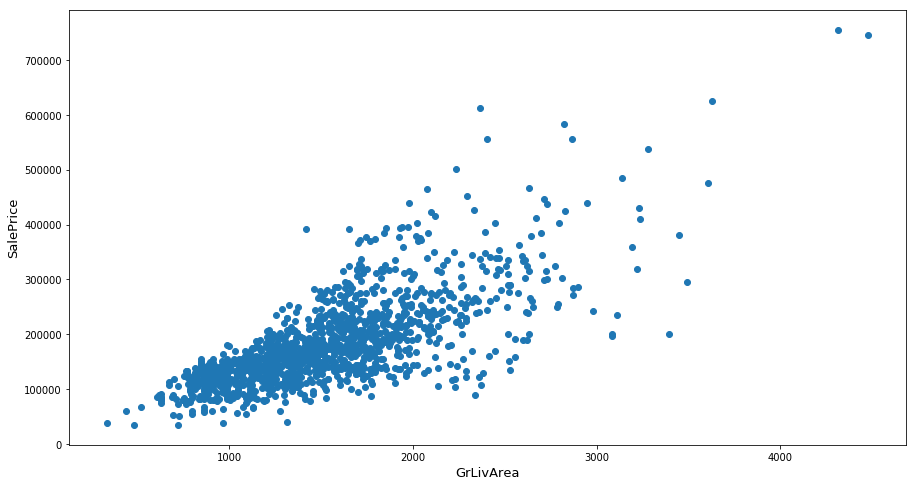

In [153]:
## We see the outliers to the very right are very out of range, thus we can take them out.
htrain = htrain.drop(htrain[(htrain['GrLivArea']>4000) & (htrain['SalePrice']<300000)].index)

## Thus now looking at our plot, it is much nicer. I decided to take out these specific outliers because they are 
## extremely high GrLivArea but for low prices, thus causing problems to our model. Hence the plot looks much better.
fig, ax = plt.subplots()
ax.scatter(htrain['GrLivArea'], htrain['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Text(0.5,1,'Housing Sale Prices by Neighborhood')

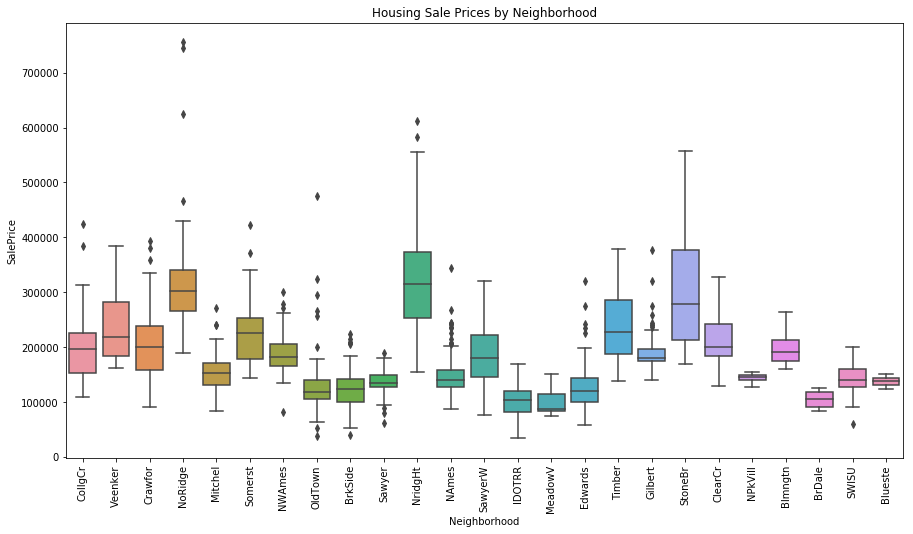

In [154]:
## Another area of notice is looking at each of the neighborhoods and finding the mean price of each home in a 
## given neighborhood.
sns.boxplot(htrain['Neighborhood'],htrain['SalePrice'])
plt.xticks(rotation='90')
plt.title('Housing Sale Prices by Neighborhood')

This is a significant column, as certain neighborhoods have significantly more variance and higher mean home prices than many of the other. It is also noted that there are not many anomalies in these neighborhoods, thus this column will be quite useful in our analysis. Interesting find in the data.

## Cleaning the Data/Feature Engineering

In [155]:
## I combine all the data together to make sure our test and training data are put together.
ntrain = htrain.shape[0]
ntest = htest.shape[0]
target = htrain.SalePrice.values
target = np.log1p(target)
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Dealing with Null Values

Text(0.5,1,'Percent missing data by feature')

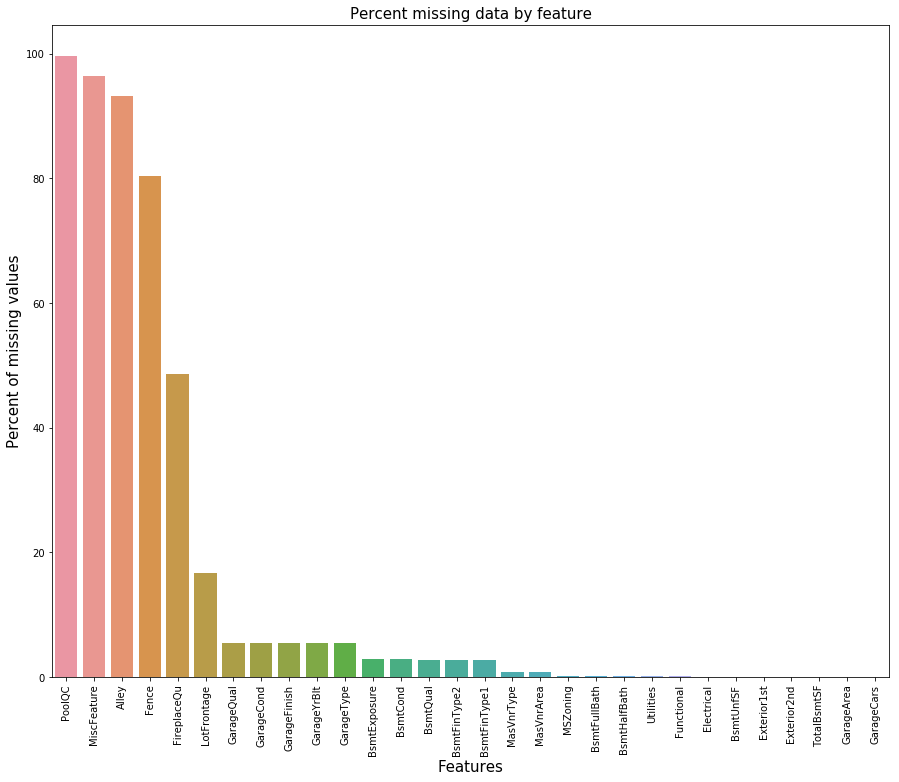

In [156]:
## We now look at the number of null data points for each column in the graph.
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

There are several variables with extremely high, thus for many of them it is fine merely filling their Null values with None or 0 depending if they are categorical or numerical features. We will either fill these null values, drop columns with low variance or do extra analysis depending on their values.

***Much of this analysis has been done by others, and I'm grabbing bits and pieces of what others did online. Many of these sigments are what I found from others online to help clean the data better for more accurate results from modeling.***

In [157]:
## Grab columns of numerical and categorical features.
def get_feature_groups(df):
    ## Grab Numerical Features
    num_features = all_data.select_dtypes(include=['int64','float64']).columns
    
    ## Grab Categorical Features
    cat_features = all_data.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)
num_features, cat_features = get_feature_groups(all_data)

In [158]:
## PoolQC : data description says NA means "No Pool", beacuse of the huge ratio of missing values.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

## MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

## Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

## Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")

## FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

## Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

## GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)    

## MasVnrArea and MasVnrType : fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
    
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero 
## for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
## BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related 
## features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [159]:
## MSZoning (The general zoning classification) : fill in missing values with 'RL'.
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

## Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
## Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. 
## We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

## Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

## Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

## KitchenQual: set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

## Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

## SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

## MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Now we will change a couple numerical variables into categorical variables, depending which will be most useful in our calculations such as year/month sold, overall condition and master subclass.

In [160]:
## MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

## Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

## Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## Feature Engineering

In [161]:
## One thing of use is getting the total square feet of a given house, thus we add several different columns together
## to give us the total square feet of each house.
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [162]:
## We now use a technique called LabelEncoding I found online, where we convert each value in certain categorical
## columns to specific values. Here is the process, as some of these values can be crucial and give us more 
## accurate results.
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))    
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 80)


**I had worked for several hours cleaning the data, but the above approaches worked the best. I have included past code from cleaning the data previously.**

In [31]:
# #Clean data for null values in numerical features.
# nulls_num = []
# for i in range(len(num_features)):
#     if all_data[num_features[i]].isnull().any() == True:
#         nulls_num.append(num_features[i])
# for i in range(len(nulls_test)):
#     all_data.loc[all_data[nulls_num[i]].isnull(),nulls_num[i]] = np.random.choice(all_data.loc[all_data[nulls_num[i]].isnull() == False,nulls_num[i]],len(all_data.loc[all_data[nulls_num[i]].isnull(),nulls_num[i]]))
# all_data.loc[:,nulls_num].info()
## Clean null values for categorical columns in data.
# nulls_cat = []
# for i in range(len(cat_features)):
#     if all_data[cat_features[i]].isnull().any() == True:
#         nulls_cat.append(cat_features[i])
# for i in range(len(nulls_cat)):
#     all_data.loc[all_data[nulls_cat[i]].isnull(),nulls_cat[i]] = 'None'#np.random.choice(all_data.loc[all_data[nulls_cat[i]].isnull() == False,nulls_cat[i]],len(all_data.loc[all_data[nulls_cat[i]].isnull(),nulls_cat[i]]))
# all_data.loc[:,nulls_cat].info()
# all_data.loc[all_data['MiscFeature'].isnull(),'MiscFeature'] = 'None'
# Column names Alley, FireplaceQu, Pool QC, and Fence have many null values. Thus we will take them out of
# the training data set as they would be difficult to model around. We will keep MiscFeature and set the rest 
# of the values to 'None' as they could be important to the selling value.
# Only three numerical columns actually have null values, and after looking at the data and reading information
# online, I will just include random variables into the null values.

In [163]:
## Now that we've finished cleaning our data, we will create dummy variables and split it into train and test again
## for modeling purposes
all_data = pd.get_dummies(all_data)
print(all_data.shape)
train = all_data[:ntrain]
test = all_data[ntrain:]

(2917, 221)


# Modeling

In [164]:
##Modeling Numerical Data with Linear Regression
X1 = train
Y1 = target
X_test1 = test

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Linear Regression Model
scaler = StandardScaler()
scaler.fit(X1)
scaled_df = scaler.transform(X1)

linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, Y1)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(Y1, predictions)
print(np.sqrt(mse))

scaler1 = StandardScaler()
scaler1.fit(X_test1)
scaled_df1 = scaler.transform(X_test1)
preds1 = linear_regression_model.predict(scaled_df1)
preds1 = np.exp(preds1)

27.1457882117


In [223]:
##Modeling Numerical Data with Linear Regression
X = train.loc[:,num_features]
Y = np.log(target)
X_test = test.loc[:,num_features]

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Linear Regression Model
scaler = StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)

linear_regression_model = SGDRegressor(tol=.00001, eta0=.01)
linear_regression_model.fit(scaled_df, Y)
predictions = linear_regression_model.predict(scaled_df)
mask = predictions <= 1
predictions[mask] = 1.1
mse = mean_squared_error(Y, predictions)
print(np.sqrt(mse))

scaler1 = StandardScaler()
scaler1.fit(X_test)
scaled_df1 = scaler.transform(X_test)
preds1 = linear_regression_model.predict(scaled_df1)
preds1 = np.exp(preds1)

0.14795293846937344


Actual Results for Linear Regression Model - RMSE: 0.14936

Our results for just numerical values for the given training data and filling in the nulls with random values of the given columns actually worked really well!! These values gave descent results, and place about 2500th overall. After running the models, I will validate each of these results.

### Averaging/Predicting with New Models

In [247]:
## Class for averaging models, given different models.
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [255]:
## Elastic Net model
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
## Gradient Boosting Regression model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
## Kernel Ridge Regression model
KRR = KernelRidge(alpha=0.4, kernel='polynomial', degree=2, coef0=2.5)
## Lasso Regression model
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))
## XGBoost Regression model
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,nthread = -1)
## LGBoost Regression model
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [249]:
## Elastic Net model, more accurate than other data we used.
ENet.fit(scaled_df,target)
enpreds = ENet.predict(scaled_df)
en_test = np.expm1(ENet.predict(scaled_df1))
print(rmsle(target,enpreds))

0.0964571135363


/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [250]:
## Kernel Ridge Regression model, VERY accurate but high possibility of overfitting. I continued to decrease the
## alpha down to 0.4, but it increases the models possiblity of overfitting and not giving as accurate resutls
## for the actual test data.
KRR.fit(scaled_df,target)
krpreds = KRR.predict(scaled_df)
kr_test = np.expm1(KRR.predict(scaled_df1))
print(rmsle(target,krpreds))

0.0534535971812


In [251]:
## Gradient Boosting Model, also very accurate (after messing with the hyper parameters). 
GBoost.fit(scaled_df,target)
gbpreds = GBoost.predict(scaled_df)
gb_test = np.expm1(GBoost.predict(scaled_df1))
print(rmsle(target,gbpreds))

0.0501104490755


In [216]:
## XGBoost model, which has been accurate but not as accurate as the Kernel Ridge Regression or Gradient 
## Boosting model. However, I have not tweeked these hyperparameters which may make a big difference.
model_xgb.fit(scaled_df, target)
xgb_train_pred = model_xgb.predict(scaled_df)
xgb_pred = np.expm1(model_xgb.predict(scaled_df1))
print(rmsle(target, xgb_train_pred))

0.0783382175553


In [256]:
## LG Boosting model, used in my winning model with the other two parameters.
model_lgb.fit(scaled_df, target)
lgb_train_pred = model_lgb.predict(scaled_df)
lgb_pred = np.expm1(model_lgb.predict(scaled_df1))
print(rmsle(target, lgb_train_pred))

my_submission = pd.DataFrame({'Id': X_test1['Id'], 'SalePrice': lgb_pred})
my_submission.to_csv('submission.csv', encoding='utf-8', index=False)

0.0626085578338


In [253]:
## Lasso Regression model, not as accurate however I do not understand the hyperparameters as well as the other ones.
lasso.fit(scaled_df,target)
lpreds = lasso.predict(scaled_df)
l_test = np.expm1(lasso.predict(scaled_df1))
print(rmsle(target,lpreds))

0.0965304471788


## Ensembling of different models

In [242]:
## By far the most accurate ensemble! However, the test results were not as accurate as the other ones.
print(rmsle(target,.5*krpreds + .5*gbpreds))

0.0461934796822


In [240]:
## Another example of ensembling with very accurate results, but clearly overfitting with a 6% difference
## between the training and test RMSE.
print(rmsle(target,.3*krpreds + .3*gbpreds + .2*lgb_train_pred + .2*xgb_train_pred))

0.0545266247123


In [244]:
## Submission of results from above, however it ended in a much better RMSE.
ensemble = .5*kr_test + .5*gb_test
my_submission = pd.DataFrame({'Id': X_test1['Id'], 'SalePrice': ensemble})
my_submission.to_csv('submission.csv', encoding='utf-8', index=False)

**RMSE: .11978**

In [243]:
## Submission of other ensembling technique of Kernel Ridge, Gradient Boosting, LG Boosting and XG Boosting. Second
## best model prediction, however barely less than my top model.
ensemble = .3*kr_test + .3*gb_test + .2*lgb_pred + .2*xgb_pred
my_submission = pd.DataFrame({'Id': X_test1['Id'], 'SalePrice': ensemble})
my_submission.to_csv('submission.csv', encoding='utf-8', index=False)

**RMSE: 0.11854**

### BEST MODEL: Ensemble of KernelRidge, GradientBoost and LGBoost

In [239]:
print(rmsle(target,.34*krpreds + .33*gbpreds + .33*lgb_train_pred))

0.052228898041


In [257]:
ensemble = .34*kr_test + .33*gb_test + .33*lgb_pred
my_submission = pd.DataFrame({'Id': X_test1['Id'], 'SalePrice': ensemble})
my_submission.to_csv('submission.csv', encoding='utf-8', index=False)

**RMSE: .11842 on Kaggle!**

## Ensembling

In [206]:
## Ensemble the three best predictions for our model. Good exercise to understand the different values coming
## from different percentages of other predictions.
n = np.arange(20)/20
print
for i in n:
    ensemble = xgb_train_pred*i + lgb_train_pred*(1-i)
    print(rmsle(target,ensemble))

0.0718315206517
0.0718347543537
0.0718704190772
0.0719384672473
0.0720388051191
0.0721712975261
0.0723357755116
0.0725320026586
0.072759752808
0.073018698677
0.0733085316276
0.0736288796644
0.0739793486826
0.0743594992992
0.0747688856389
0.0752070526875
0.0756734848252
0.0761676496302
0.0766890102472
0.0772370438071


**Model Selection:** Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?

I tried several different models, based on what other people were using in their kernels and based on what models were most accurate. I personally do not understand all aspects of these different libraries but understand the general idea of them, whether they are using boosting, regression, tree-type structures in their models.

I first used Linear Regression, and actually obtained quite accurate results from the models. I used all the data available for the first run through (all 221 different columns) and didn't receive very accurate results. However, I then only included numerical columns from the training set without the dummy variables and received an RMSE of 14.79% on the training and an RMSE of 14.94% which was quite accurate for only linear regression!! Cleaning the data made a big impact on the error, but it was cool to see how well the Linear Regression ran on the data.

After running these, I started looking at other kernels and seeing models that to kernels were using. I used a range of models including Lasso Regression, Gradient Boosting, XG Boosting, LG Boosting, Kernel Ridge Regression and ElasticNet models that each performed quite well in their own aspects. I specifically messed with the hyperparameters of Gradient Boosting, which had lower RMSE as I continued to lower the alpha with them.

**Model interpretation:** What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?

The model results were very good. Many of these new models we used at the end were very accurate, and we can see by their RMSE. Now, each of these models did overfit that data, as the only model that had similar train and test results was the Linear Regression used at the beginning. However, for this exercise, I was extremely focused on the extra credit of beating the TA of 0.115, which I ended up getting close but still need a lot of tuning of parameters to decrease the RMSE farther. As we see in the covariance matrix, many of the variables on surface area, quality condition and specific amenities seemed to be highly correlated, and made a big difference. 

I'm very confident with the results I've obtained as they are similar with other results that people attained as well. The results are similar, however there is the possibility of variance and of overfitting the data. 

**Model usefulness:** Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

I think the final model would be useful. The model won't perform perfectly, there will be some variance but an RMSE of about .11842 can be used for most points. The probability of certain points increasing the RMSE down would increase. However, I do believe the majority of these points are very close to the actual, as the RMSE is quite low. Overall, I would definitely recommend this system to someone wanting a rough idea of a house price based on these parameters. We also do need to realize that this is a model: models aren't perfect, and to increase the model will take more time and fine tuning to get into production and automation. 